In [4]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
#from pyAgrum.lib.pretty_print import pretty_cpt

from IPython.display import display, Math, Latex

# Hector le robot jongleur
>from Roland Donat

Hector, le robot jongleur, lâche souvent les balles avec lesquelles il jongle quand sa batterie est faible. D'après les expériences précédentes, il a été déterminé que la probabilité qu'il lâche une balle quand sa batterie est faible est de $0.9$. D'autre part, quand sa batterie n'est pas faible, la probabilité qu'il lâche une balle est seulement de $0.01$. Quand la batterie a été rechargée il y a peu de temps, il y a seulement $5\%$ de chances que la batterie soit faible contre $50\%$ si la batterie n'a pas été rechargée récemment. 

Un premier système de vision $O1$ (peu fiable) observe le robot et nous prévient lorsqu'il croit que Hector a lâché une balle. Un autre système $O2$ (indépendant du premier) agit de la même façon. Le but de cet exercice est de modéliser les résultats des observateurs en fonction de ce que fait Hector et de son état. 

## Structure du réseau bayésien

Construire un BN pour ce problème en considérant :

+ Quelles variables (booléenne) de modélisation ?
+ Quelle structure ?
+ Quelle est la forme de la distribution de probabilité jointe pour ce BN 
+ $O1$ et $O2$ sont ils indépendantes ? A quelle condition deviennent-elles indépéndantes ?

Les variables de modélisation sont LB (balle lâchée ou non par Hector), BF (batterie faible), R (batterie ayant été rechargée il y a peu de temps), O1 (premier système de vision) et O2 (second système de vision).

<IPython.core.display.Math object>

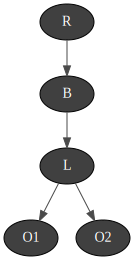

In [2]:
bn=gum.BayesNet()

L=bn.add(gum.LabelizedVariable("L","Lache balle",["lachee","paslachee"]))
B=bn.add(gum.LabelizedVariable("B","Baterie",["faible","pasfaible"]))
R=bn.add(gum.LabelizedVariable("R","Batterie rechargée",["yalongtemps","toutjuste"]))
O1=bn.add(gum.LabelizedVariable("O1","Balle lachée selon le 1er système de vision",["lachee","RAS"]))
O2=bn.add(gum.LabelizedVariable("O2","Balle lachée selon le 2nd système de vision",["lachee","RAS"]))

bn.addArc(R,B)
bn.addArc(B,L)
bn.addArc(L,O1)
bn.addArc(L,O2)

display(Math(r"$P(R,B,L,O1,O2) = P(R)*P(B|R)*P(L|B)*P(01|L)*P(O2|L)$"))

gnb.showBN(bn)

O1 et O2 ne sont pas indépendantes, elles le sont conditionnellement à L donc le deviennent si l'on connaît L.

## Paramètres du réseau bayésien

Proposer les CPTs pour le BN. Quelle données vous manque-t-il pour avoir l'ensemble du modèle bien renseigné ?

Pour avoir l'ensemble du modèle bien renseigné il nous manque P(R),P(01|L) et P(O2|L).

In [3]:
bn.cpt(L)[{"B": "faible"}] = [0.9, 0.1]
bn.cpt(L)[{'B': 'pasfaible'}] = [0.01, 0.99]
display(Math(r"$P(L|B)$"))
bn.cpt(L)

<IPython.core.display.Math object>

(gum::Potential<double>@0x38d9cc0) <L:lachee|B:faible> :: 0.9 /<L:paslachee|B:faible> :: 0.1 /<L:lachee|B:pasfaible> :: 0.01 /<L:paslachee|B:pasfaible> :: 0.99

In [4]:
bn.cpt(B)[{"R": "toutjuste"}] = [0.05, 0.95]
bn.cpt(B)[{"R": "yalongtemps"}] = [0.5, 0.5]
display(Math(r"$P(B|R)$"))
bn.cpt(B)

<IPython.core.display.Math object>

(gum::Potential<double>@0x39509e0) <B:faible|R:yalongtemps> :: 0.5 /<B:pasfaible|R:yalongtemps> :: 0.5 /<B:faible|R:toutjuste> :: 0.05 /<B:pasfaible|R:toutjuste> :: 0.95

## inférence dans le réseau bayésien

On suppose maintenant que la fiabilité des observateurs $O1$ et $O2$ est de respectivement $70\%$ et $90\%$.

+ Calculer la probabilité a priori de chaque nœud
+ $O1$ observe que Hector a lâché la balle. Quelle est la probabilité que la batterie soit faible ? Comparer cette valeur avec sa probabilité à priori.
+ On ajoute que $O2$ n'a rien vu. Quelle est la nouvelle probabilité que la batterie soit faible ?

On choisit les probabilités suivantes pour R :

In [5]:
bn.cpt(R).fillWith([0.3,0.7])

(gum::Potential<double>@0x391a6d0) <R:yalongtemps> :: 0.3 /<R:toutjuste> :: 0.7

In [6]:
bn.cpt()[{"L": "lachee"}] = [0.7, 0.3]
bn.cpt(O1)[{"L": "paslachee"}] = [0.3, 0.7]
display(Math(r"$P(O1|L)$"))
bn.cpt(O1)

<IPython.core.display.Math object>

(gum::Potential<double>@0x3903430) <O1:lachee|L:lachee> :: 0.7 /<O1:RAS|L:lachee> :: 0.3 /<O1:lachee|L:paslachee> :: 0.3 /<O1:RAS|L:paslachee> :: 0.7

In [8]:
bn.cpt(O2)[{"L": "lachee"}] = [0.9, 0.1]
bn.cpt(O2)[{"L": "paslachee"}] = [0.1, 0.9]
display(Math(r"$P(O2|L)$"))
bn.cpt(O2)

<IPython.core.display.Math object>

(gum::Potential<double>@0x38708c0) <O2:lachee|L:lachee> :: 0.9 /<O2:RAS|L:lachee> :: 0.1 /<O2:lachee|L:paslachee> :: 0.1 /<O2:RAS|L:paslachee> :: 0.9

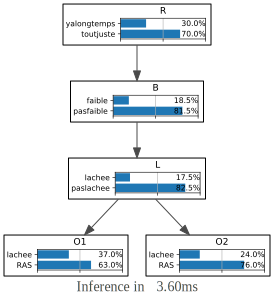

In [9]:
gnb.showInference(bn)

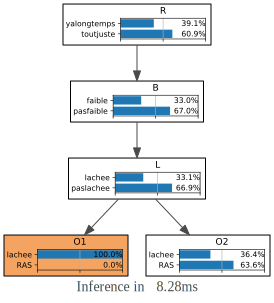

In [11]:
gnb.showInference(bn,evs={'O1':'lachee'})

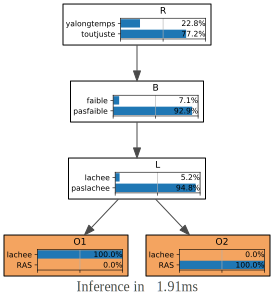

In [14]:
gnb.showInference(bn,evs={'O1':'lachee','O2':'RAS'})